In [49]:
##Lab | Random Forests

## A Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 
##In simpler terms, a Random Forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [2]:
import pandas as pd
import numpy as np

In [6]:
categorical = pd.read_csv('/Users/simonefischer/Ironhack/Week_7/Day_4/Morning/lab-random-forests/files_for_lab/categorical.csv')
numerical = pd.read_csv('/Users/simonefischer/Ironhack/Week_7/Day_4/Morning/lab-random-forests/files_for_lab/numerical.csv')
target = pd.read_csv('/Users/simonefischer/Ironhack/Week_7/Day_4/Morning/lab-random-forests/files_for_lab/target.csv')

In [8]:
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [9]:
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


In [10]:
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


For this lab, you will be using the CSV files provided in the files_for_lab folder.

Instructions
Apply the Random Forest algorithm to predict the TARGET_B. Please note that this column suffers from class imbalance. Fix the class imbalance using upsampling.
Discuss the model predictions and it's impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How much the money the company will not earn because of missclassifications made by the model?
Sklearn classification models are trained to maximize the accuracy. However, another error metric will be more relevant here. Which one? Please checkout make_scorer alongside with GridSearchCV in order to train the model to maximize the error metric of interest in this case.

In [16]:
data = pd.concat([numerical, categorical, target], axis = 1)

data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,...,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,91,11,92,7,95,12,90,1,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,87,11,94,11,95,12,87,2,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,93,10,96,1,96,1,79,3,0,0.0


In [18]:
data.shape

(95412, 339)

In [19]:
data.isna().sum()

TCODE           0
AGE             0
INCOME          0
WEALTH1         0
HIT             0
               ..
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
TARGET_B        0
TARGET_D        0
Length: 339, dtype: int64

In [27]:
data.nunique()

TCODE           55
AGE             97
INCOME           7
WEALTH1         10
HIT             75
                ..
LASTDATE_MM     12
FIRSTDATE_YR    26
FIRSTDATE_MM    12
TARGET_B         2
TARGET_D        71
Length: 339, dtype: int64

In [15]:
data['TARGET_B'].value_counts()

TARGET_B
0    90569
1     4843
Name: count, dtype: int64

In [ ]:
#we need to do train/test split before downsampling, and then only downsample the training set

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

X_cat  = X.select_dtypes(object)

levels = [ list(X[col].unique()) for col in X_cat.columns ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_num = X_train.select_dtypes(np.number)
X_test_num  = X_test.select_dtypes(np.number)

X_train_cat = X_train.select_dtypes(object)
X_test_cat  = X_test.select_dtypes(object)

##we encode the data so that later we can perform a regresison, though it's not needed for the data

encoder = OneHotEncoder(drop='first', categories=levels).fit(X_train_cat)

X_train_cat_encoded_np = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded_np  = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded_np, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded_np,  columns=encoder.get_feature_names_out(), index=X_test.index)

X_train = pd.concat([X_train_num, X_train_cat_encoded_df], axis = 1)
X_test  = pd.concat([X_test_num, X_test_cat_encoded_df], axis = 1)


In [47]:
##it makes sense to only sample the train data

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

X_train_resampled.shape, y_train_resampled.shape

((7686, 355), (7686,))

In [41]:
X_train_resampled

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_G,RFA_2A_F,RFA_2A_D,GEOCODE2_A,GEOCODE2_D,GEOCODE2_B,DOMAIN_A_S,DOMAIN_A_R,DOMAIN_A_U,DOMAIN_A_C
14209,1,88.000000,2,1,1,0,34,0,58,7,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
75084,0,49.000000,7,9,0,0,39,37,39,8,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
69361,0,61.611649,2,9,0,5,34,30,62,13,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48729,28,36.000000,6,7,0,0,26,73,3,3,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
39972,0,52.000000,7,8,4,0,32,41,23,5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86107,1,36.000000,4,4,21,0,14,4,42,17,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20006,0,78.000000,4,9,0,0,49,46,42,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
73135,2,75.000000,5,9,0,0,79,3,82,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1871,28,61.611649,5,9,0,0,24,51,3,3,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
y_train_resampled.value_counts()

TARGET_B
0    3843
1    3843
Name: count, dtype: int64

The Accuracy for the Random Forest in the TRAIN set is 1.00
The Accuracy for the Random Forest in the TEST  set is 1.00


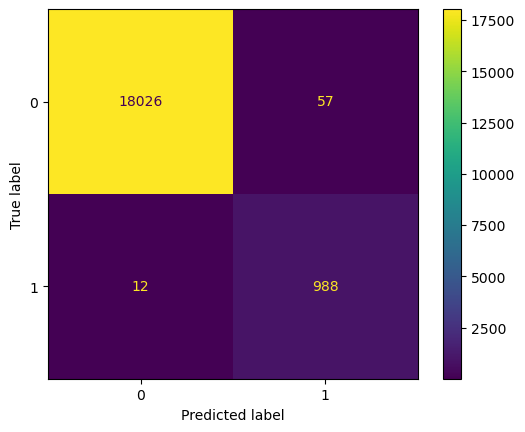

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)

##n-estimators is 100 by default --> number of threes in the forest

clf.fit(X_train_resampled, y_train_resampled)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_resampled, y_train_resampled)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

y_test_pred = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=clf.classes_);
disp.plot()

In [45]:
# For cross validation
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)

cross_val_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=10)

print("The mean Accuracy of the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean Accuracy of the folds was 0.99


In [46]:
cross_val_scores

array([0.98569571, 0.98179454, 0.99739922, 0.99349805, 0.98049415,
       0.99479844, 0.99869792, 0.99479167, 1.        , 0.99739583])

In [58]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5,10],
}

clf = RandomForestClassifier(random_state=42)


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import confusion_matrix, classification_report

# Create a scorer for recall (sensitivity)
scorer = make_scorer(recall_score)

In [59]:
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scorer, n_jobs=-1)

# Fit the model on the upsampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

In [61]:
best_model

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=150, random_state=42)

In [63]:
from sklearn.model_selection import cross_val_score

random_forest = RandomForestClassifier(max_depth=20, 
                                  min_samples_leaf=5, 
                                  min_samples_split=5,
                                  n_estimators=150, 
                                  random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(random_forest, X_train_resampled, y_train_resampled, cv=5)

# Print the mean R2 over the folds
print("The mean R2 of over the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean R2 of over the folds was 1.00


In [64]:
cross_val_scores

array([1.        , 0.99934938, 1.        , 0.99934938, 1.        ])

In [66]:
random_forest.fit(X_train, y_train)
print("The R2 for the model in the TRAIN set is {:.3f}".format(random_forest.score(X_train,y_train)))
print("The R2 for the model in the TEST set is {:.3f}".format(random_forest.score(X_test,y_test)))

The R2 for the model in the TRAIN set is 1.000
The R2 for the model in the TEST set is 1.000


In [60]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[18081     2]
 [    1   999]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18083
           1       1.00      1.00      1.00      1000

    accuracy                           1.00     19083
   macro avg       1.00      1.00      1.00     19083
weighted avg       1.00      1.00      1.00     19083

